# Details on the kaggle competition

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Using TensorFlow backend.


In [2]:
train = pd.read_csv("input/jigsaw-toxic-comment-classification-challenge/train.csv")
test = pd.read_csv("input/jigsaw-toxic-comment-classification-challenge/test.csv")

submission = pd.read_csv('input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv')

# 1. Peak on the input datasets

In [3]:
print("## train_data:")
train[train.severe_toxic > 0].head(2)

## train_data:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0


In [4]:
print("## test_data:")
test.head(2)

## test_data:


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


In [5]:
print("## submission_data:")
submission.head(2)

## submission_data:


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5


# 2. Do stats on the data like count 

In [6]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,3f9fefa1b975e1e0,:Time reversal? Entropy of the universe? This ...
freq,1,1


In [8]:
submission.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.0,153164.0,153164.0,153164.0,153164.0,153164.0
mean,0.5,0.5,0.5,0.5,0.5,0.5
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.5,0.5,0.5,0.5,0.5,0.5
25%,0.5,0.5,0.5,0.5,0.5,0.5
50%,0.5,0.5,0.5,0.5,0.5,0.5
75%,0.5,0.5,0.5,0.5,0.5,0.5
max,0.5,0.5,0.5,0.5,0.5,0.5


# 3. Check for missing data

In [9]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
identity_hate,0,0.0
insult,0,0.0
threat,0,0.0
obscene,0,0.0
severe_toxic,0,0.0
toxic,0,0.0
comment_text,0,0.0
id,0,0.0



Luckly, we dont have any missing data. so we dont need to fill null values.
It is also good to verify null values on test, submission data, found there is no missing values in them.


# 4. Data analysis on training set

## 4.1 Distribution of toxic-comment-category 

In [10]:
display(train.toxic.value_counts())
display(train.severe_toxic.value_counts())
display(train.obscene.value_counts())
display(train.threat.value_counts())
display(train.insult.value_counts())
display(train.identity_hate.value_counts())
#sns.countplot(x="toxic", data=train, orient='v');

0    144277
1     15294
Name: toxic, dtype: int64

0    157976
1      1595
Name: severe_toxic, dtype: int64

0    151122
1      8449
Name: obscene, dtype: int64

0    159093
1       478
Name: threat, dtype: int64

0    151694
1      7877
Name: insult, dtype: int64

0    158166
1      1405
Name: identity_hate, dtype: int64

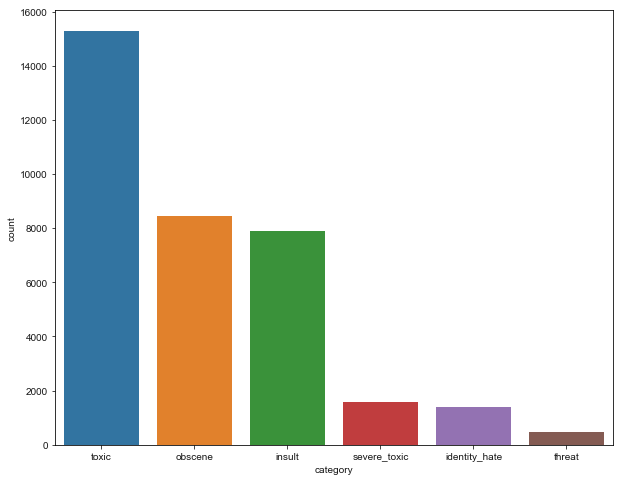

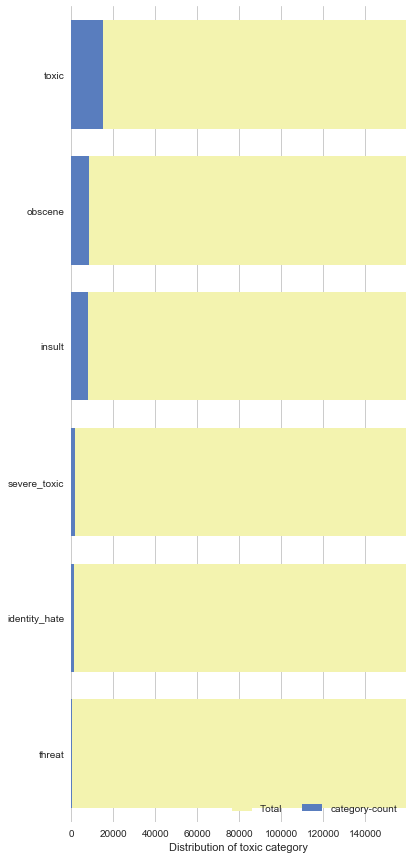

In [11]:
d = {'category' : ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], 
     'count' : [15294, 1595, 8449, 478, 7877, 1405],
     'total' : [159571, 159571, 159571, 159571, 159571, 159571]
    }
train_value_counts = pd.DataFrame(d).sort_values("count", ascending=False)

plt.rcParams["figure.figsize"] = [10,8]
sns.barplot(x="category", y="count", data=train_value_counts, );

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total comments
sns.set_color_codes("pastel")
sns.barplot(x="total", y="category", data=train_value_counts,
            label="Total", color="y")

# Plot the toxic comments per category
sns.set_color_codes("muted")
sns.barplot(x="count", y="category", data=train_value_counts,
            label="category-count", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right")
ax.set(xlim=(0, 159571), ylabel="",
       xlabel="Distribution of toxic category")
sns.despine(left=True, bottom=True)

## 4.2 comments with one/all toxic-comment-category

Lets observe really bad comments, that is if all catrgories are true.

In [12]:
train_reallybad = train[(train.toxic>0) & (train.severe_toxic>0) & (train.obscene>0)
                        & (train.threat>0) & (train.insult>0) & (train.identity_hate>0)]
train_reallybad.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1


In [13]:
train_bad = train[(train.toxic>0) | (train.severe_toxic>0) | (train.obscene>0)
                        | (train.threat>0) | (train.insult>0) | (train.identity_hate>0)]
train_bad.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0


In [21]:
print(len(train_bad))
print(len(train_reallybad))    

16225
31


**Out of 159571 comments there are:**
* **16225** comments that are bad **toxic | severe_toxic | obscene | threat | insult | identity_hate**
* **31** comments that are very bad **toxic & severe_toxic & obscene & threat & insult & identity_hate**

## 4.3 Correlation among catgories

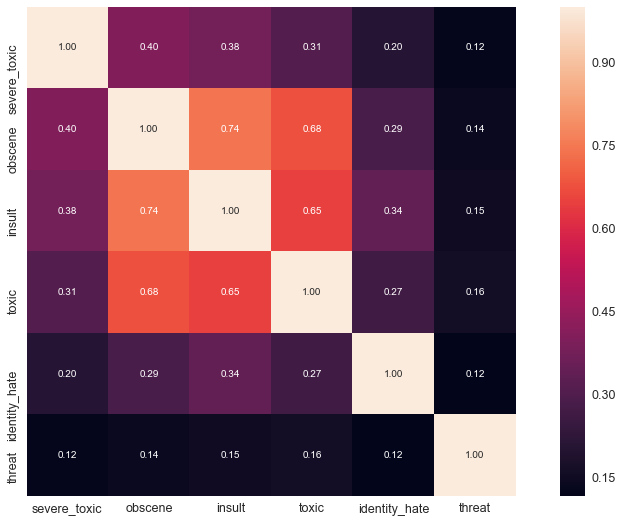

In [227]:
#correlation matrix
corrmat = train.corr()
plt.rcParams["figure.figsize"] = [16,9]
cols = corrmat.nlargest(10, 'severe_toxic')['severe_toxic'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From the heatmap, there is an high correlation among obscene, insult, toxic comments

## 4.4 Percentage of Intersection of two catgories ~ Correlation value ??

Lets try out by considering 2 categories (obscene, insult)

In [229]:
#ax = sns.tsplot(data=train, estimator=np.median)
np.logical_and(train['obscene'], train['insult']).value_counts()

False    153416
True       6155
Name: obscene, dtype: int64

Total obscene comments: **8449**   
Total insult comments: **7877**   
Total obscene and insult comments: **6155**

Percentage of obscene comments that are also insult comments: 6155/8449 = 72.8%    
Percentage of insult comments that are also obscene comments: 6155/7877 = 78.1%     
The correlation value of 74 among obscene and insult looks like an average value of 72, 78.

**So, We can use correlation value as a measure of intersection among 2 categories.**